In [72]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score


In [73]:
data=pd.read_csv('Fraud_check.csv')

In [74]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [76]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [77]:
data1=pd.get_dummies(data,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [78]:
data1

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [80]:
data1["TaxInc"] = pd.cut(data1["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [81]:
data1

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


In [82]:
data1 = pd.get_dummies(data1,columns = ["TaxInc"],drop_first=True)

In [83]:
data1

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


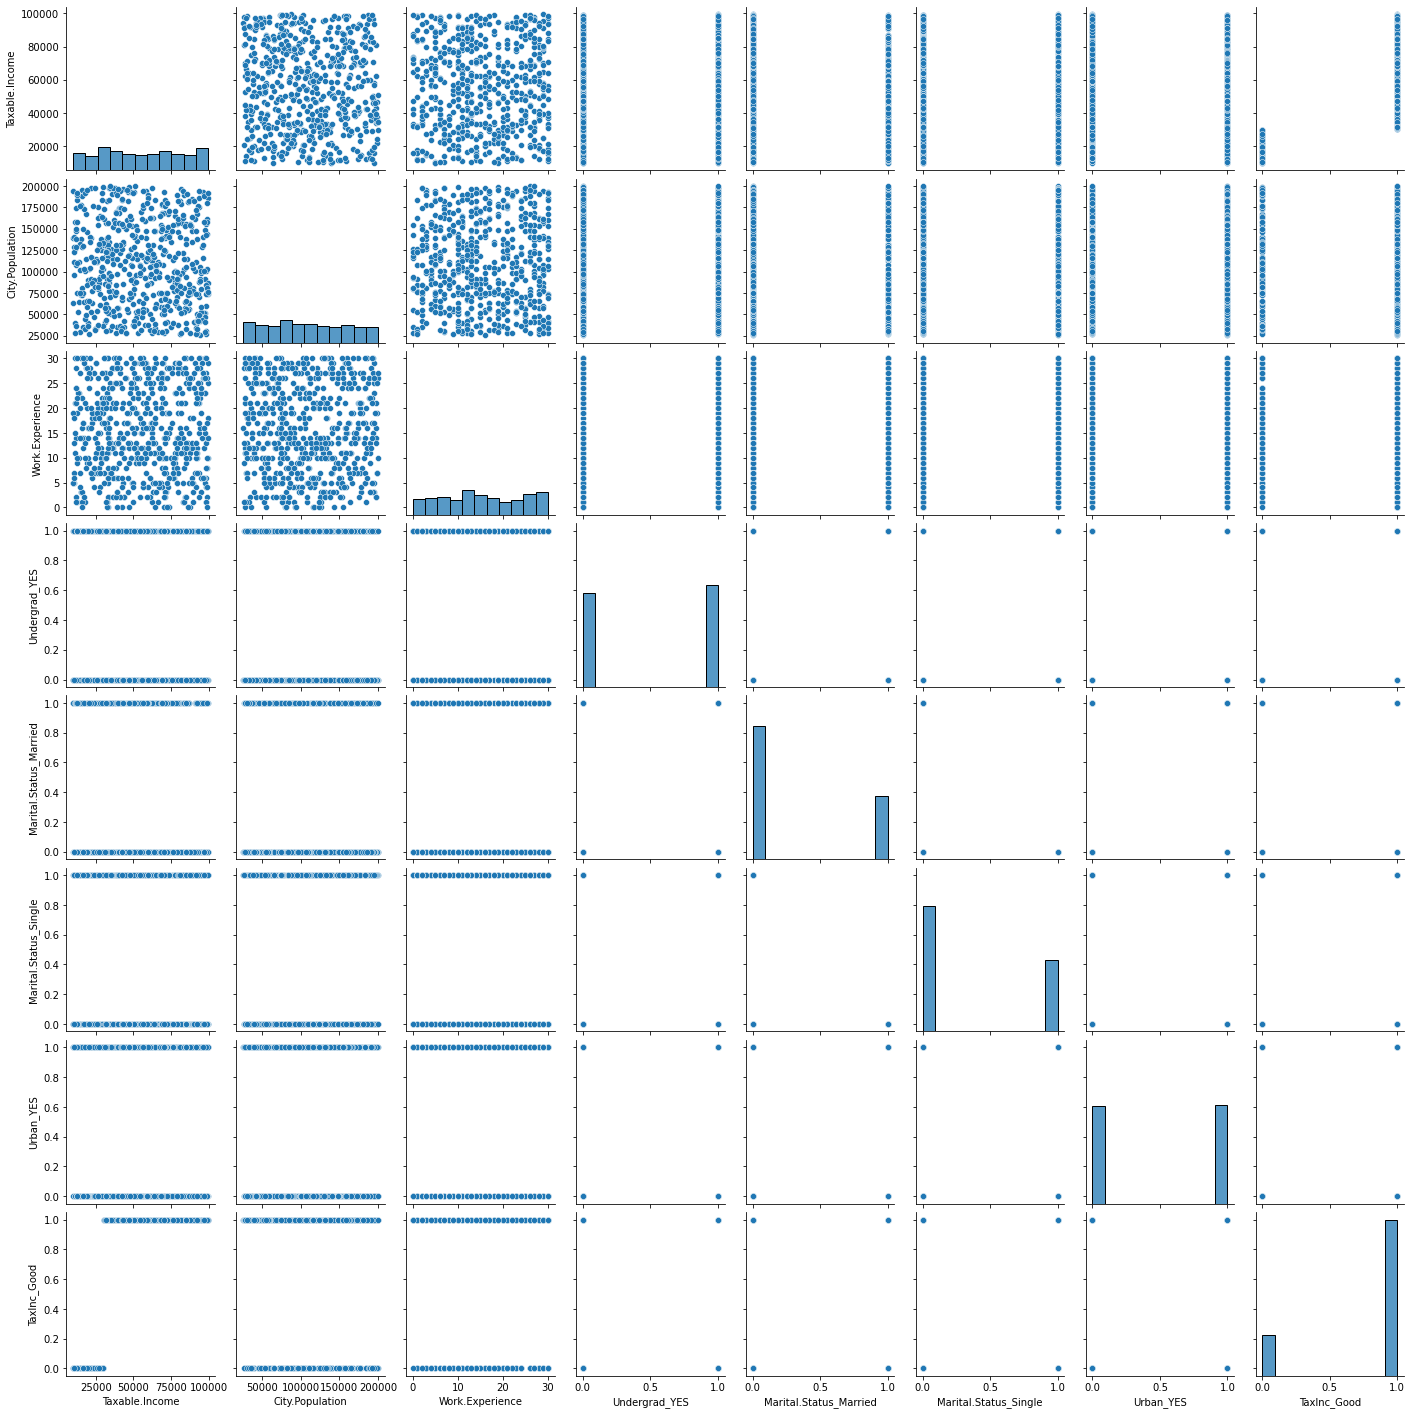

In [84]:
sns.pairplot(data1);

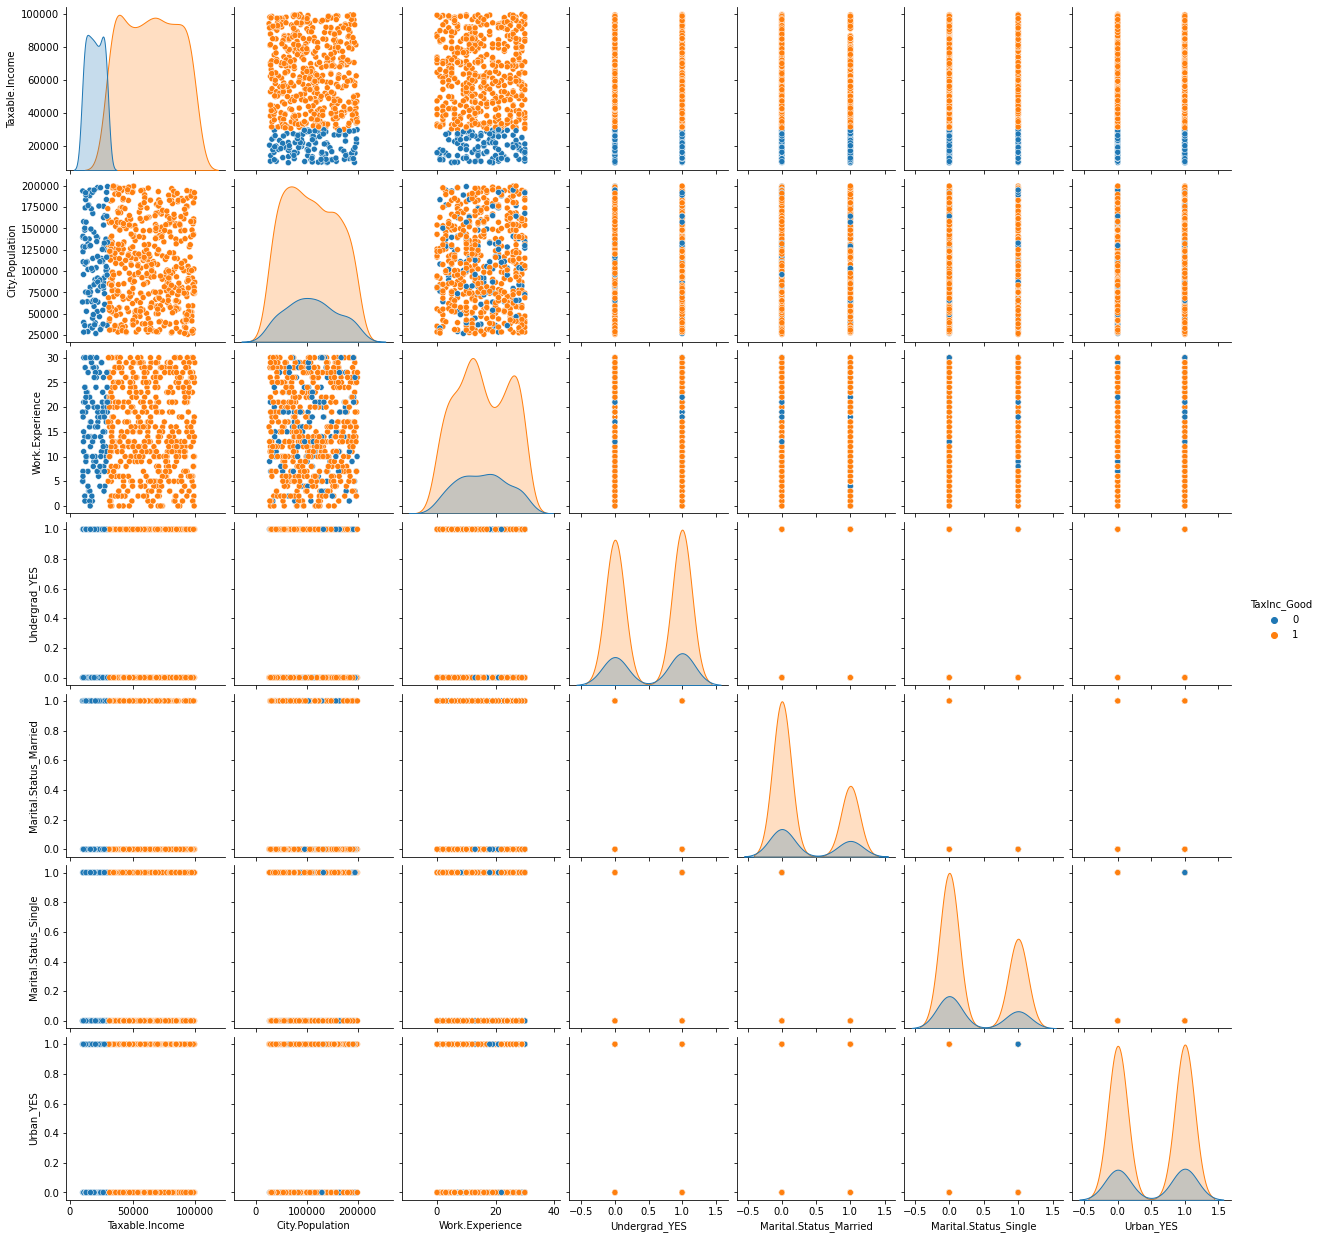

In [85]:
sns.pairplot(data=data1, hue='TaxInc_Good');

In [86]:
def norm_func(i):
    X = (i-i.min())/(i.max()-i.min())
    return (X)

In [87]:
df_norm = norm_func(data1.iloc[:,1:])

In [88]:
df_norm

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0


In [89]:
x = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']

In [90]:
x

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0


In [91]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
595    1.0
596    1.0
597    1.0
598    1.0
599    1.0
Name: TaxInc_Good, Length: 600, dtype: float64

In [92]:
labels = np.array(data1['Work.Experience'])

In [93]:
labels

array([10, 18, 30, 15, 28,  0,  8,  3, 12,  4, 19,  6, 14, 16, 13, 29, 29,
       25,  6, 30, 26,  7, 14, 12, 30, 27, 15, 12,  5, 30,  0, 21, 23, 21,
        1, 30,  5,  5,  3, 16, 26,  1, 12, 10, 22, 14, 27,  2, 12, 15,  3,
       30, 23,  7, 23, 16, 25, 13, 15, 11, 23,  8, 13,  9, 15, 29, 12, 24,
        5, 29,  3, 22, 27,  2, 17, 19, 11, 26,  0,  7, 26, 24, 26, 18,  4,
       12, 29, 23, 24, 20, 29, 10, 13,  3,  6, 28, 17, 19, 18, 12, 25, 20,
       23,  5, 14, 15, 20,  6, 10,  8, 19, 11, 26,  7,  7, 21, 12, 29, 10,
       30, 11, 16, 26, 26, 13, 11,  3, 28, 27, 26,  7, 16, 12, 14, 28, 19,
        9,  6, 25, 20,  4, 23, 26, 11, 29,  2, 28, 28, 21, 25, 28, 10, 16,
       28, 29,  7,  3,  5, 11,  1,  0, 30, 21, 15, 28, 23, 22, 25, 30,  6,
       10, 24, 23, 16,  8, 13, 28, 13, 15, 22, 19, 20,  4, 30, 15,  0, 19,
        5, 10, 11, 19,  7, 10, 25, 28, 13, 21,  4, 28,  9, 17, 27,  0,  4,
       14, 20, 16, 28,  3, 25, 13,  8, 14, 13, 16, 22, 22, 19, 19,  9, 30,
       14, 27, 17, 25,  0

In [94]:
features= data1.drop('Work.Experience', axis = 1)

In [95]:
features

,Taxable.Income,City.Population,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,0,0,1,1,1
1,33700,134075,1,0,0,1,1
2,36925,160205,0,1,0,1,1
3,50190,193264,1,0,1,1,1
4,81002,27533,0,1,0,0,1
...,...,...,...,...,...,...,...
595,76340,39492,1,0,0,1,1
596,69967,55369,1,0,0,1,1
597,47334,154058,0,0,0,1,1
598,98592,180083,1,1,0,0,1


In [96]:
feature_list = list(data1.columns)

In [97]:
feature_list

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

In [98]:
features = np.array(data1)

In [99]:
features

array([[ 68833,  50047,     10, ...,      1,      1,      1],
       [ 33700, 134075,     18, ...,      0,      1,      1],
       [ 36925, 160205,     30, ...,      0,      1,      1],
       ...,
       [ 47334, 154058,      0, ...,      0,      1,      1],
       [ 98592, 180083,     17, ...,      0,      0,      1],
       [ 96519, 158137,     16, ...,      0,      0,      1]], dtype=int64)

In [100]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.55, random_state = 42)

In [101]:
baseline_preds = test_features[:, feature_list.index('Taxable.Income')]

In [102]:
baseline_errors = abs(baseline_preds - test_labels)

In [103]:
np.mean(baseline_errors)

54279.27575757576

In [104]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [105]:
rf.fit(train_features, train_labels);

In [106]:
predictions = rf.predict(test_features)

In [107]:
predictions

array([1.8999e+01, 2.0011e+01, 2.8000e+01, 2.6000e+01, 2.0001e+01,
       2.1995e+01, 1.8999e+01, 1.3000e+01, 4.2000e-02, 2.9996e+01,
       1.5997e+01, 9.9960e+00, 7.9770e+00, 2.7002e+01, 2.8001e+01,
       1.3997e+01, 3.9000e-02, 1.3997e+01, 1.5000e+01, 2.9028e+01,
       2.9997e+01, 2.5999e+01, 2.9730e+00, 2.0070e+00, 1.3997e+01,
       8.0010e+00, 2.7002e+01, 1.8998e+01, 1.2001e+01, 2.0011e+01,
       7.0030e+00, 1.5000e+01, 2.5999e+01, 1.7013e+01, 9.9960e+00,
       2.5997e+01, 1.2001e+01, 1.3000e+01, 2.4011e+01, 2.7000e-02,
       1.7013e+01, 2.9978e+01, 7.9730e+00, 2.9023e+01, 2.9990e+01,
       3.9460e+00, 1.5998e+01, 1.4000e+01, 8.9830e+00, 2.4007e+01,
       2.4005e+01, 1.7014e+01, 2.0000e+01, 9.9950e+00, 1.7992e+01,
       2.7000e+01, 2.4989e+01, 2.2996e+01, 6.0000e+00, 1.3000e+01,
       1.1000e+01, 2.8000e+01, 9.9930e+00, 1.4000e+01, 8.9690e+00,
       2.9630e+00, 2.9022e+01, 9.9890e+00, 2.4007e+01, 2.4998e+01,
       2.2986e+01, 7.9990e+00, 1.9002e+01, 8.9720e+00, 2.9981e

In [108]:
errors = abs(predictions - test_labels)

In [109]:
np.mean(errors)

0.010833333333333308